## Observations and Insights 

## Analysis Observations

1. Capomulin and Ramicane were the most effective drugs to reduce the tumor volume as referenced in the drug regiment bar chart.

2. Ketapril and Naftisol were the least affective drugs to use to treat the mice and yielded similar results to the Placebo group as reflected in the datadrame. 

3. The correlation between mouse weight and average tumor volume is 0.84 and it is positive. This means that the bigger and heavier mouse would yield a bigger tumor volume. This is also noted when breaking down the sex of the mice from males vs females. The males are biologically bigger than female mice and had bigger tumor volumes compared to the female mice.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = len(mouse_study_df["Mouse ID"].value_counts())
total_mice

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study_df.loc[mouse_study_df['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study_df.drop_duplicates(subset = ["Mouse ID","Timepoint"])
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = mouse_study_df.drop_duplicates(subset = ["Mouse ID","Timepoint"])
new_total_mice.count()


Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_study = new_total_mice.groupby(["Drug Regimen"])
average_tumor = round(drug_study["Tumor Volume (mm3)"].mean(),2)
average_tumor

# Calculate the median
median_tumor = round(drug_study["Tumor Volume (mm3)"].median(),2)
median_tumor

# Calculate the variance
variance_tumor = round(drug_study["Tumor Volume (mm3)"].var(),2)
variance_tumor

# Calculate the standard devation
std_tumor = round(drug_study["Tumor Volume (mm3)"].std(),2)
std_tumor

# Calculate the SEM
SEM_tumor = round(drug_study["Tumor Volume (mm3)"].sem(),2)
SEM_tumor

Drug Regimen
Capomulin    0.33
Ceftamin     0.47
Infubinol    0.49
Ketapril     0.60
Naftisol     0.60
Placebo      0.58
Propriva     0.53
Ramicane     0.32
Stelasyn     0.57
Zoniferol    0.52
Name: Tumor Volume (mm3), dtype: float64

In [7]:
# Assemble the resulting series into a single summary dataframe.
tumor_summary = pd.DataFrame({"Average Tumor": average_tumor,
      "Median Tumor Volume": median_tumor,
      "Variance of Tumor Volume": variance_tumor,
      "Standard Deviation of Tumor Volume": std_tumor,
      "SEM of Tumor Volume": SEM_tumor})
tumor_summary.head(10)

,Average Tumor,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_aggregation = round(drug_study["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]),2)

tumor_summary_aggregation = tumor_summary_aggregation.rename(columns={"mean": "Mean Tumor Volume",
                                                  "median": "Median Tumor Volume",
                                                   "var": "Variance Tumor Volume",
                                                   "std":"Standard Dev Tumor Volume ", 
                                                   "sem":"SM Tumor Volume"})
tumor_summary_aggregation

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

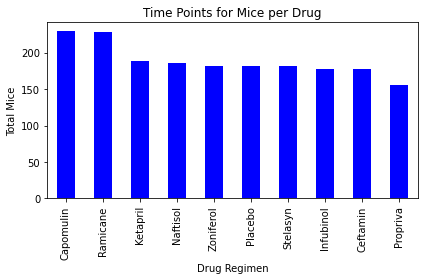

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = new_total_mice["Drug Regimen"].value_counts()
bar_drug_plot = drug_regimen.plot(kind="bar", title="Time Points for Mice per Drug", figsize=(6,4), color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.tight_layout()
plt.show()


In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimenpd = drug_regimen
drug_regimenpd.head(10)

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

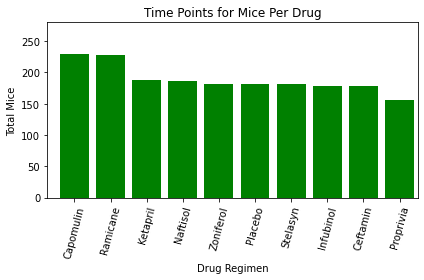

In [11]:
x_axis = np.arange(len(drug_regimenpd))
total_mice = drug_regimenpd

ticks=list(drug_regimenpd.index.values)
tick_locations = [value for value in x_axis]

plt.bar(x_axis, total_mice, color="green", align="center")
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Proprivia"], rotation="75")

plt.xlim(-0.75, len(x_axis)-0.5)
plt.ylim(0, max(total_mice)+50)


plt.title("Time Points for Mice Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.tight_layout()
plt.show()


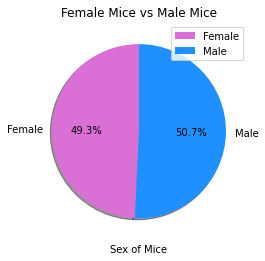

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
malevfemale = new_total_mice.groupby(["Sex"]).count()
sexpie_plot = malevfemale.plot(kind="pie", y="Mouse ID", title=("Female Mice vs Male Mice"), 
                                figsize=(6,4), colors=["orchid","dodgerblue"], autopct="%1.1f%%", shadow=True, startangle=90)

plt.xlabel("Sex of Mice")
plt.ylabel("")
plt.show()

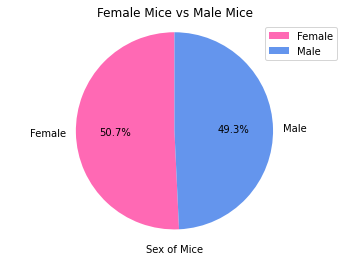

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
malevfemalepy = new_total_mice["Sex"].value_counts()

mice_labels = ["Female","Male"]
plt.pie(malevfemalepy, labels = mice_labels, colors = ["hotpink", "cornflowerblue"],autopct="%1.1f%%", startangle=90)
plt.title("Female Mice vs Male Mice")
plt.xlabel("Sex of Mice")
plt.legend(mice_labels, loc="best")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# # Start by getting the last (greatest) timepoint for each mouse  
tumor_volume = new_total_mice.groupby(["Mouse ID"])["Timepoint"].max()
tumor_volume.head(10)

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
a401    45
a411    45
a444    45
a457    10
a492    45
Name: Timepoint, dtype: int64

In [15]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(tumor_volume , new_total_mice, on=(["Mouse ID","Timepoint"]))
new_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    iqr_treatment = new_df.loc[new_df["Drug Regimen"] == treatment]
    tumor_volume= iqr_treatment["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volume)
tumor_vol_data
    


[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes
quartiles = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

quartiles1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1

quartiles2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

quartiles3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

In [18]:
# Print Results
print(f"Values for {treatments[0]} below {lower_bound} and above {upper_bound} could be outliers")
print(f"Values for {treatments[1]} below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"Values for {treatments[2]} below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"Values for {treatments[3]} below {lower_bound3} and above {upper_bound3} could be outliers")

Values for Capomulin below 20.70456164999999 and above 51.83201549 could be outliers
Values for Ramicane below 17.912664470000003 and above 54.30681135 could be outliers
Values for Infubinol below 36.83290494999999 and above 82.74144559000001 could be outliers
Values for Ceftamin below 25.355449580000002 and above 87.66645829999999 could be outliers


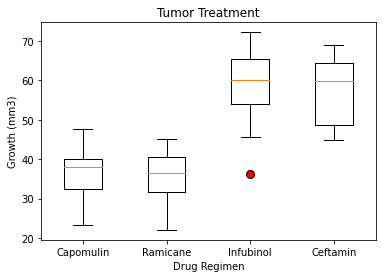

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = dict(marker="o", markerfacecolor="red", markersize=8, linestyle="none")
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Treatment")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Growth (mm3)")
ax1.boxplot(tumor_vol_data,  flierprops=boxplot, labels = treatments)
plt.show()


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = new_total_mice.loc[new_total_mice["Drug Regimen"] == "Capomulin"]
mouse_capomulin.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

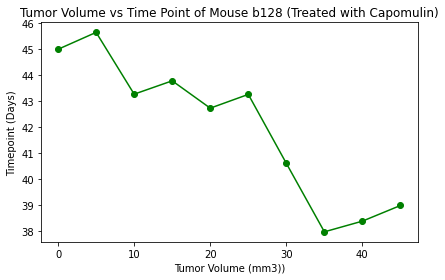

In [21]:
#Chose random mouse to plot data
b128 = new_total_mice.loc[new_total_mice["Mouse ID"] == "b128"]

x_days = b128["Timepoint"]
y_tumor = b128["Tumor Volume (mm3)"]

plt.plot(x_days, y_tumor, color="green", marker = "o")
plt.title("Tumor Volume vs Time Point of Mouse b128 (Treated with Capomulin)")
plt.xlabel("Tumor Volume (mm3))")
plt.ylabel("Timepoint (Days)")
plt.tight_layout()
plt.show()

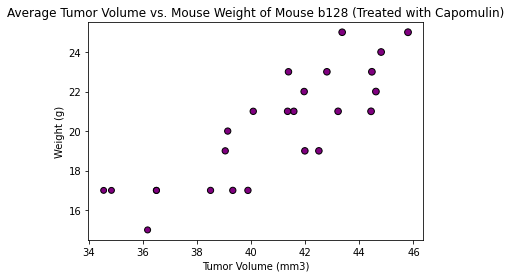

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
b128 = mouse_capomulin.groupby(["Mouse ID"]).mean()
avg_tumor_vol = b128["Tumor Volume (mm3)"]
mouse_weight = b128["Weight (g)"]

plt.scatter(avg_tumor_vol, mouse_weight, marker="o", facecolors="purple", edgecolors="black", s=avg_tumor_vol)
plt.title("Average Tumor Volume vs. Mouse Weight of Mouse b128 (Treated with Capomulin)")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between between mouse weight and average tumor volume for the Capomulin is 0.84


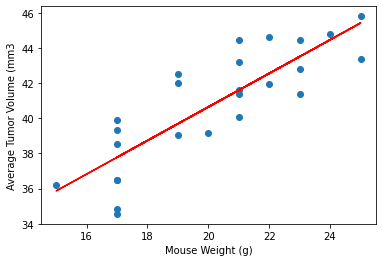

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)

regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight, regress_values,"-r")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3")
print(f"The correlation between between mouse weight and average tumor volume for the Capomulin is {round(correlation[0],2)}")
plt.show()